In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
MAXIMUM_Q_VALUE = 0.005
ANALYSE_RECALIBRATED_FEATURES = False

for one of the runs, for each sequence-charge, find...
- sequence identified
- theoretical mass
- measured mass of feature before recalibration
- mass error before recalibration
- measured mass of feature after recalibration
- mass error after recalibration

In [3]:
# percolator output files
PERCOLATOR_OUTPUT_FILE = '/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/percolator-output/190719_Hela_Ecoli.percolator.target.psms.txt'
PERCOLATOR_RECALIBRATED_OUTPUT_FILE = '/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/recalibrated-percolator-output/190719_Hela_Ecoli.percolator.target.psms.txt'

# percolator stdout files
PERCOLATOR_STDOUT_FILE = '/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/percolator-output/percolator-stdout.log'
PERCOLATOR_RECALIBRATED_STDOUT_FILE = '/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/recalibrated-percolator-output/recalibrated-percolator-stdout.log'


In [4]:
# determine the mapping between the percolator index and the run file name - this is only
# available by parsing percolator's stdout redirected to a text file.
def find_percolator_file_mapping(percolator_stdout_file_name):
    mapping = []
    with open(percolator_stdout_file_name) as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('INFO: Assigning index'):
                splits = line.split(' ')
                percolator_index = int(splits[3])
                comet_filename = splits[5]
                run_name = comet_filename.split('/')[-1].split('.')[0]  # e.g. 190719_Hela_Ecoli_1to3_06
                mapping.append((percolator_index, run_name))
    mapping_df = pd.DataFrame(mapping, columns=['percolator_idx','run_name'])
    return mapping_df

In [5]:
before_recal_mapping_df = find_percolator_file_mapping(PERCOLATOR_STDOUT_FILE)
after_recal_mapping_df = find_percolator_file_mapping(PERCOLATOR_RECALIBRATED_STDOUT_FILE)

In [6]:
before_recal_file_idx_for_analysis = 5

In [7]:
before_recal_run_name = before_recal_mapping_df[before_recal_mapping_df.percolator_idx == before_recal_file_idx_for_analysis].iloc[0].run_name

In [8]:
before_recal_run_name

'190719_Hela_Ecoli_1to3_09'

In [9]:
after_recal_file_idx_for_analysis = after_recal_mapping_df[after_recal_mapping_df.run_name == '{}-recalibrated'.format(before_recal_run_name)].iloc[0].percolator_idx

In [10]:
after_recal_run_name = after_recal_mapping_df[after_recal_mapping_df.percolator_idx == after_recal_file_idx_for_analysis].iloc[0].run_name

In [11]:
after_recal_run_name

'190719_Hela_Ecoli_1to3_09-recalibrated'

In [12]:
before_recal_psms_df = pd.read_csv(PERCOLATOR_OUTPUT_FILE, sep='\t')
before_recal_psms_df = before_recal_psms_df[before_recal_psms_df['percolator q-value'] <= MAXIMUM_Q_VALUE]
before_recal_psms_df = before_recal_psms_df[before_recal_psms_df.file_idx == before_recal_file_idx_for_analysis]

In [13]:
after_recal_psms_df = pd.read_csv(PERCOLATOR_RECALIBRATED_OUTPUT_FILE, sep='\t')
after_recal_psms_df = after_recal_psms_df[after_recal_psms_df['percolator q-value'] <= MAXIMUM_Q_VALUE]
after_recal_psms_df = after_recal_psms_df[after_recal_psms_df.file_idx == after_recal_file_idx_for_analysis]

In [38]:
len(before_recal_psms_df.sequence.unique()), len(after_recal_psms_df.sequence.unique())

(13942, 12763)

In [14]:
before_recal_features_file_name = '/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/features/{}-features.pkl'.format(before_recal_run_name)
after_recal_features_file_name = '/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/recalibrated-features/{}-features.pkl'.format(after_recal_run_name)

In [15]:
before_recal_features_file_name, after_recal_features_file_name

('/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/features/190719_Hela_Ecoli_1to3_09-features.pkl',
 '/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/recalibrated-features/190719_Hela_Ecoli_1to3_09-recalibrated-features.pkl')

In [16]:
before_recal_features_df = pd.read_pickle(before_recal_features_file_name)
before_recal_features_df.drop(['candidate_phr_error','envelope','mono_adjusted','original_phr','original_phr_error','rt_curve_fit','rt_lower','rt_upper','scan_curve_fit','scan_lower','scan_upper'], axis=1, inplace=True)


In [17]:
before_recal_features_df.head()

,charge,feature_id,intensity,intensity_full_rt_extent,monoisotopic_mz,precursor_id,rt_apex,scan_apex
0,2,1,13783048.0,16997235,966.089416,70616,1059.48,153.30
1,2,2,12917021.0,9025785,939.436570,67718,1017.77,144.59
2,2,3,11682827.0,8945913,939.436586,67678,1017.77,148.64
3,2,4,11629952.0,10478065,966.088615,70689,1059.23,117.49
4,2,5,11268887.0,11259017,516.801143,9733,312.75,855.18


In [18]:
after_recal_features_df = pd.read_pickle(after_recal_features_file_name)


In [19]:
after_recal_features_df.tail()

,feature_id,charge,rt_apex,scan_apex,intensity,precursor_id,monoisotopic_mass,predicted_mass_error,recalibrated_monoisotopic_mass,recalibrated_monoisotopic_mz
150669,150670,1,617.07,225.00,82.0,33790,940.782643,-0.000805,940.783449,941.790725
150670,150671,1,1055.88,499.86,77.0,70939,787.365609,-0.005898,787.371507,788.378783
150671,150672,1,785.38,622.01,77.0,48357,728.794747,-0.006038,728.800785,729.808061
150672,150673,2,719.89,697.00,70.0,42926,1289.483753,-0.006344,1289.490096,645.752324
150673,150674,1,1061.97,166.42,64.0,70917,992.174087,-0.003755,992.177841,993.185117


In [20]:
after_recal_features_df[after_recal_features_df.feature_id == 10]

,feature_id,charge,rt_apex,scan_apex,intensity,precursor_id,monoisotopic_mass,predicted_mass_error,recalibrated_monoisotopic_mass,recalibrated_monoisotopic_mz
9,10,2,743.77,665.64,10122131.0,44853,1371.568412,-0.001642,1371.570054,686.792303


In [21]:
# merge the features for this file so we get the feature underlying the sequence identification
combined_psms_df = pd.merge(before_recal_psms_df, before_recal_features_df, how='left', left_on=['scan'], right_on=['feature_id'], suffixes=('_psms','_before'))
combined_psms_df = pd.merge(combined_psms_df, after_recal_features_df, how='left', left_on=['scan'], right_on=['feature_id'], suffixes=('_psms','_after'))

In [22]:
combined_psms_df.columns

Index(['file_idx', 'scan', 'charge_psms', 'spectrum precursor m/z',
       'spectrum neutral mass', 'peptide mass', 'percolator score',
       'percolator q-value', 'percolator PEP', 'total matches/spectrum',
       'sequence', 'protein id', 'flanking aa', 'charge_before',
       'feature_id_psms', 'intensity_psms', 'intensity_full_rt_extent',
       'monoisotopic_mz', 'precursor_id_psms', 'rt_apex_psms',
       'scan_apex_psms', 'feature_id_after', 'charge', 'rt_apex_after',
       'scan_apex_after', 'intensity_after', 'precursor_id_after',
       'monoisotopic_mass', 'predicted_mass_error',
       'recalibrated_monoisotopic_mass', 'recalibrated_monoisotopic_mz'],
      dtype='object')

In [23]:
PROTON_MASS = 1.007276
ADD_C_CYSTEINE_DA = 57.021464

In [24]:
identifications_df = pd.DataFrame()
identifications_df['sequence'] = combined_psms_df.sequence
identifications_df['theoretical_mass'] = combined_psms_df['peptide mass'] + (combined_psms_df.sequence.str.count('C') * ADD_C_CYSTEINE_DA)
identifications_df['measured_mass_before_recal'] = (combined_psms_df.monoisotopic_mz * combined_psms_df.charge_before) - (PROTON_MASS * combined_psms_df.charge_before)
identifications_df['measured_mass_after_recal'] = combined_psms_df.recalibrated_monoisotopic_mass
identifications_df['feature_mono_mz_before_recal'] = combined_psms_df.monoisotopic_mz
identifications_df['feature_mono_mz_after_recal'] = combined_psms_df.recalibrated_monoisotopic_mz
identifications_df['mass_accuracy_ppm_before_recal'] = ((identifications_df.measured_mass_before_recal - identifications_df.theoretical_mass) / identifications_df.theoretical_mass) * 10**6
identifications_df['mass_accuracy_ppm_after_recal'] = ((identifications_df.measured_mass_after_recal - identifications_df.theoretical_mass) / identifications_df.theoretical_mass) * 10**6
identifications_df['rt_apex'] = combined_psms_df.rt_apex_after
identifications_df['scan_apex'] = combined_psms_df.scan_apex_after
identifications_df['intensity'] = combined_psms_df.intensity_after

In [25]:
identifications_df = identifications_df[(identifications_df.mass_accuracy_ppm_before_recal >= -10) & (identifications_df.mass_accuracy_ppm_before_recal <= 10)]
identifications_df = identifications_df[(identifications_df.mass_accuracy_ppm_after_recal >= -10) & (identifications_df.mass_accuracy_ppm_after_recal <= 10)]

In [26]:
identifications_df.head()

,sequence,theoretical_mass,measured_mass_before_recal,measured_mass_after_recal,feature_mono_mz_before_recal,feature_mono_mz_after_recal,mass_accuracy_ppm_before_recal,mass_accuracy_ppm_after_recal,rt_apex,scan_apex,intensity
0,EAESCDCLQGFQLTHSLGGGTGSGMGTLLISK,3310.526728,3310.530828,3310.526911,1104.517552,1104.516246,1.238396,0.055288,874.74,360.34,4894895.0
1,FCGAEGLNNVITLSTFR,1897.935564,1897.934923,1897.935577,949.974738,949.975064,-0.337611,0.006753,917.22,320.72,1450040.0
2,FCGAEGLNNVITLSTFR,1897.935564,1897.934790,1897.935402,949.974671,949.974977,-0.407690,-0.085360,917.22,321.13,1366302.0
3,FCGAEGLNNVITLSTFR,1897.935564,1897.933026,1897.934822,949.973789,949.974687,-1.337099,-0.390726,917.21,321.82,503401.0
4,AEEHISSSHGDVDYAQASAELAK,2414.098600,2414.097917,2414.098925,805.706582,805.706918,-0.282788,0.134667,438.88,678.63,636214.0


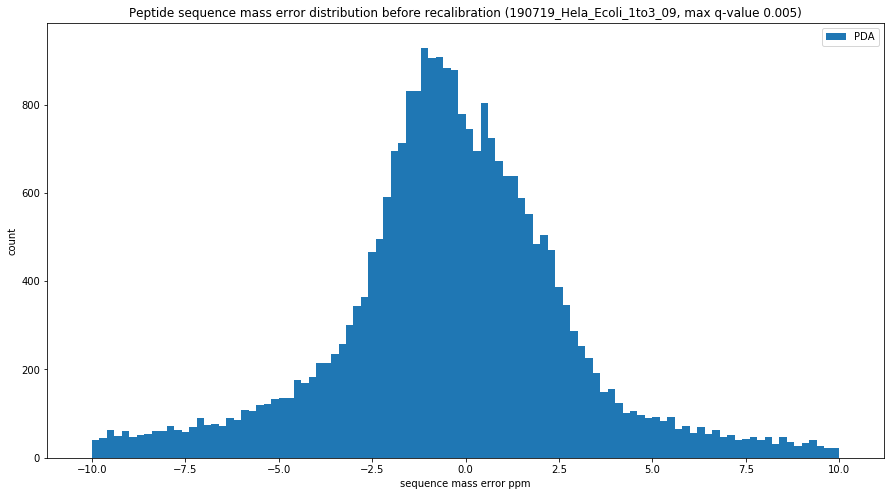

In [27]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide sequence mass error distribution before recalibration ({}, max q-value {})'.format(before_recal_run_name, MAXIMUM_Q_VALUE))

bins = 100
hist, bins, _ = plt.hist(identifications_df.mass_accuracy_ppm_before_recal, bins=bins, label='PDA')
plt.legend(loc='best')
plt.xlabel('sequence mass error ppm')
plt.ylabel('count')

plt.show()

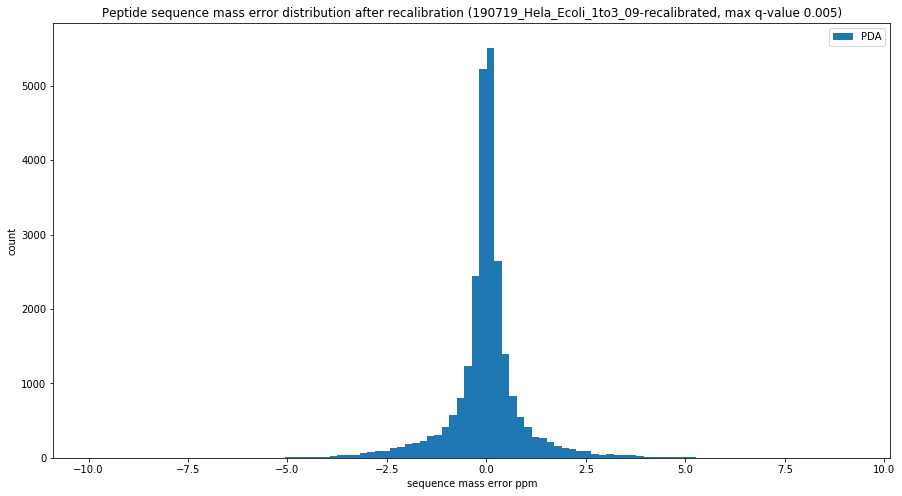

In [28]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide sequence mass error distribution after recalibration ({}, max q-value {})'.format(after_recal_run_name, MAXIMUM_Q_VALUE))

bins = 100
hist, bins, _ = plt.hist(identifications_df.mass_accuracy_ppm_after_recal, bins=bins, label='PDA')
plt.legend(loc='best')
plt.xlabel('sequence mass error ppm')
plt.ylabel('count')

plt.show()

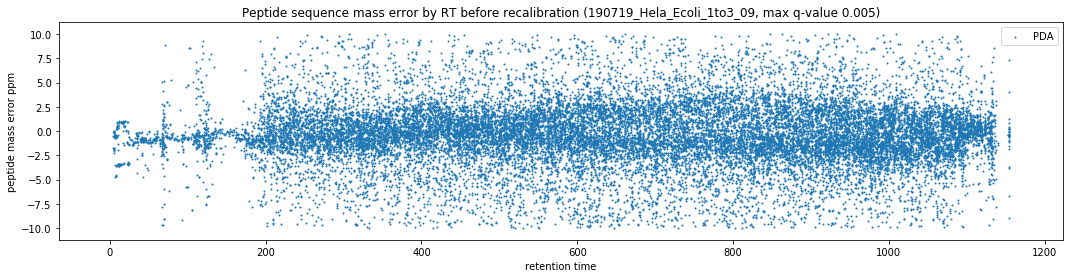

In [29]:
f, ax = plt.subplots()
f.set_figheight(4)
f.set_figwidth(18)

plt.margins(0.06)
plt.title('Peptide sequence mass error by RT before recalibration ({}, max q-value {})'.format(before_recal_run_name,MAXIMUM_Q_VALUE))

ax.scatter(identifications_df.rt_apex, identifications_df.mass_accuracy_ppm_before_recal, marker='o', lw=0, s=4, alpha=1.0, label="PDA")

plt.legend(loc='best')
plt.ylabel('peptide mass error ppm')
plt.xlabel('retention time')
# plt.xlim((300,400))

plt.show()

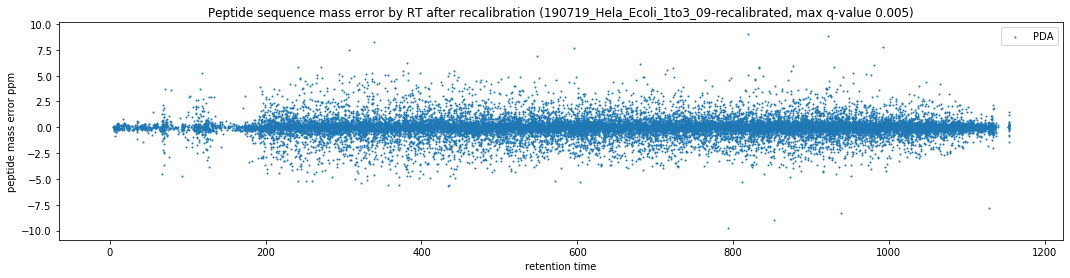

In [30]:
f, ax = plt.subplots()
f.set_figheight(4)
f.set_figwidth(18)

plt.margins(0.06)
plt.title('Peptide sequence mass error by RT after recalibration ({}, max q-value {})'.format(after_recal_run_name,MAXIMUM_Q_VALUE))

ax.scatter(identifications_df.rt_apex, identifications_df.mass_accuracy_ppm_after_recal, marker='o', lw=0, s=4, alpha=1.0, label="PDA")

plt.legend(loc='best')
plt.ylabel('peptide mass error ppm')
plt.xlabel('retention time')
# plt.xlim((300,400))

plt.show()

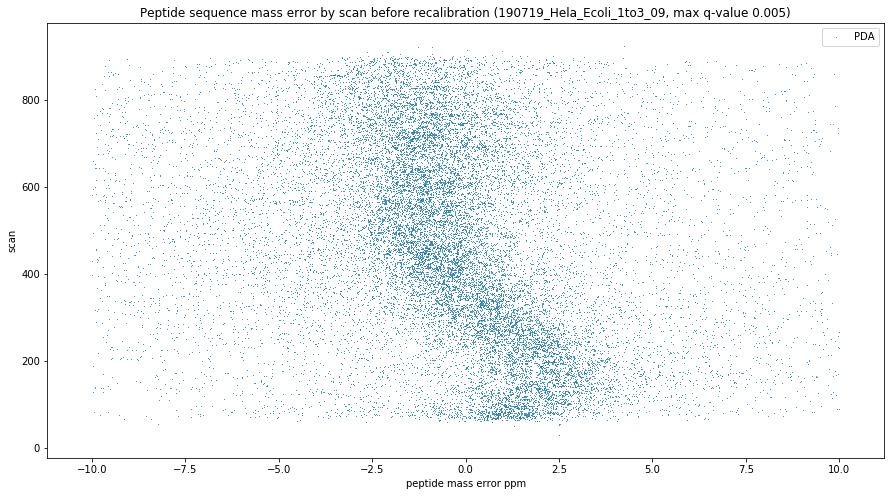

In [31]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide sequence mass error by scan before recalibration ({}, max q-value {})'.format(before_recal_run_name,MAXIMUM_Q_VALUE))

ax.scatter(identifications_df.mass_accuracy_ppm_before_recal, identifications_df.scan_apex, marker='o', lw=0, s=1, alpha=1.0, label="PDA")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('scan')

plt.show()

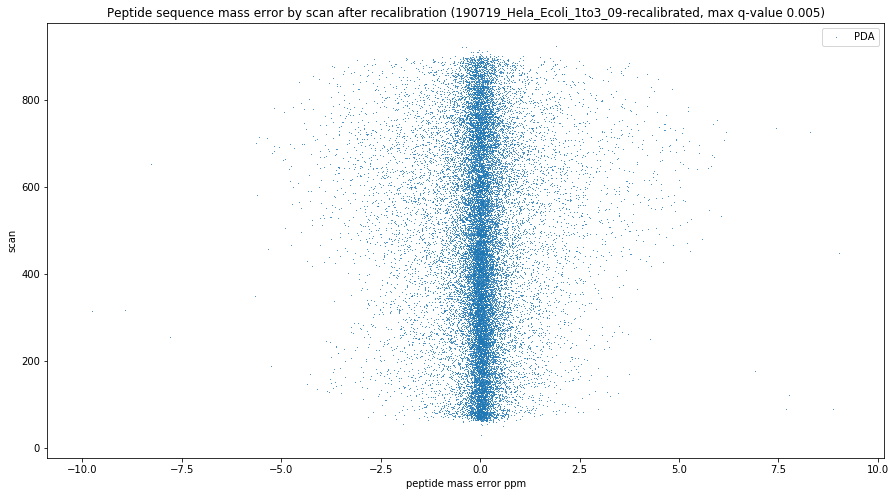

In [32]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide sequence mass error by scan after recalibration ({}, max q-value {})'.format(after_recal_run_name,MAXIMUM_Q_VALUE))

ax.scatter(identifications_df.mass_accuracy_ppm_after_recal, identifications_df.scan_apex, marker='o', lw=0, s=1, alpha=1.0, label="PDA")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('scan')

plt.show()

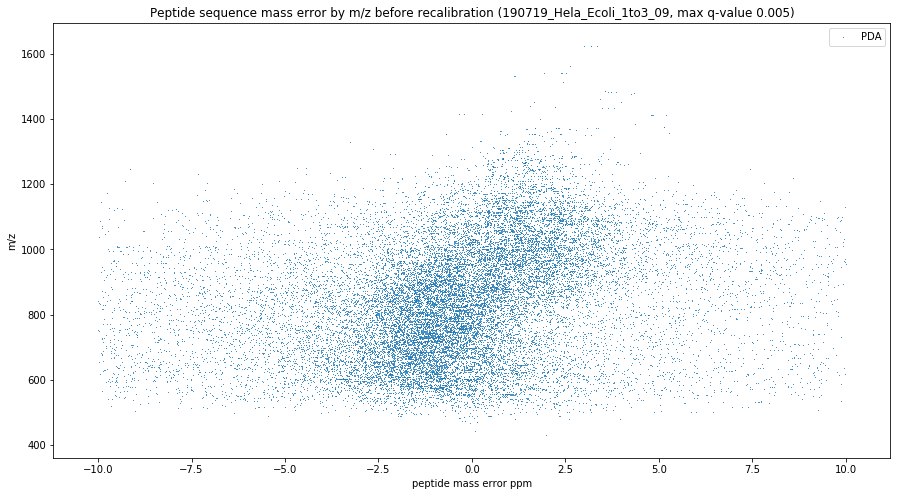

In [33]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide sequence mass error by m/z before recalibration ({}, max q-value {})'.format(before_recal_run_name,MAXIMUM_Q_VALUE))

ax.scatter(identifications_df.mass_accuracy_ppm_before_recal, identifications_df.feature_mono_mz_before_recal, marker='o', lw=0, s=1, alpha=1.0, label="PDA")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('m/z')

plt.show()

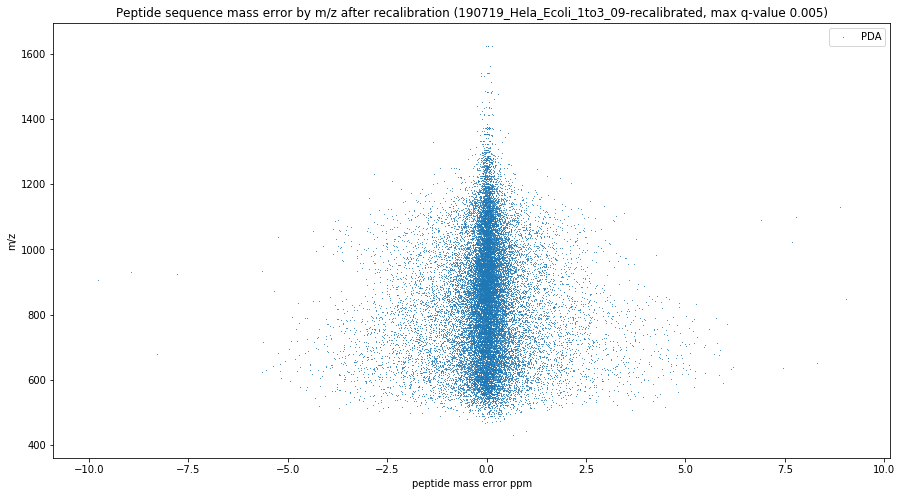

In [34]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide sequence mass error by m/z after recalibration ({}, max q-value {})'.format(after_recal_run_name,MAXIMUM_Q_VALUE))

ax.scatter(identifications_df.mass_accuracy_ppm_after_recal, identifications_df.feature_mono_mz_after_recal, marker='o', lw=0, s=1, alpha=1.0, label="PDA")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('m/z')

plt.show()

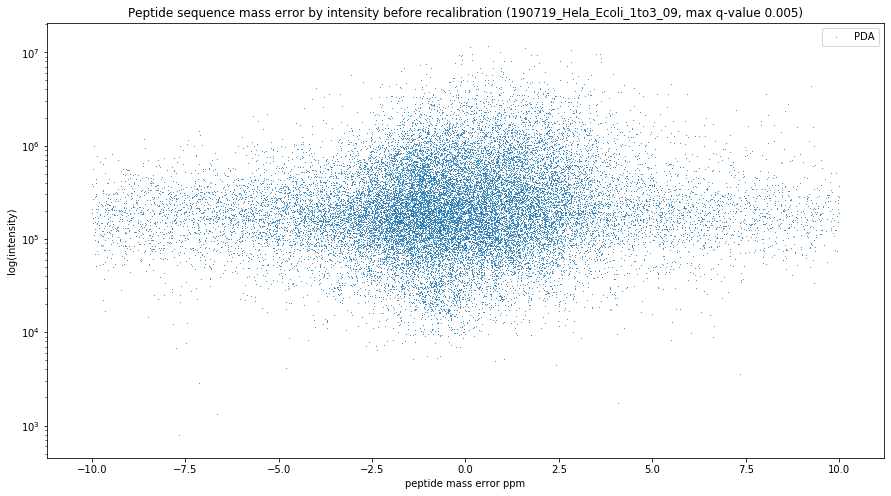

In [35]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide sequence mass error by intensity before recalibration ({}, max q-value {})'.format(before_recal_run_name,MAXIMUM_Q_VALUE))

ax.scatter(identifications_df.mass_accuracy_ppm_before_recal, identifications_df.intensity, marker='o', lw=0, s=1, alpha=1.0, label="PDA")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('log(intensity)')
ax.set_yscale('log')

plt.show()

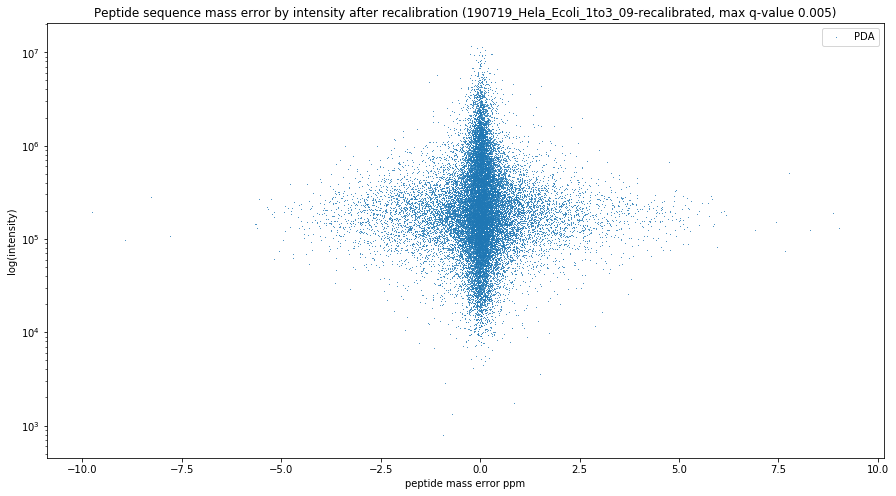

In [36]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide sequence mass error by intensity after recalibration ({}, max q-value {})'.format(after_recal_run_name,MAXIMUM_Q_VALUE))

ax.scatter(identifications_df.mass_accuracy_ppm_after_recal, identifications_df.intensity, marker='o', lw=0, s=1, alpha=1.0, label="PDA")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('log(intensity)')
ax.set_yscale('log')

plt.show()